Blockhouse Work Trial Task - Melissa Oliver

1. Construct and code the linear OW model and nonlinear AFS model, and visualize the distribution of price impact based on the given data. (33 pt)

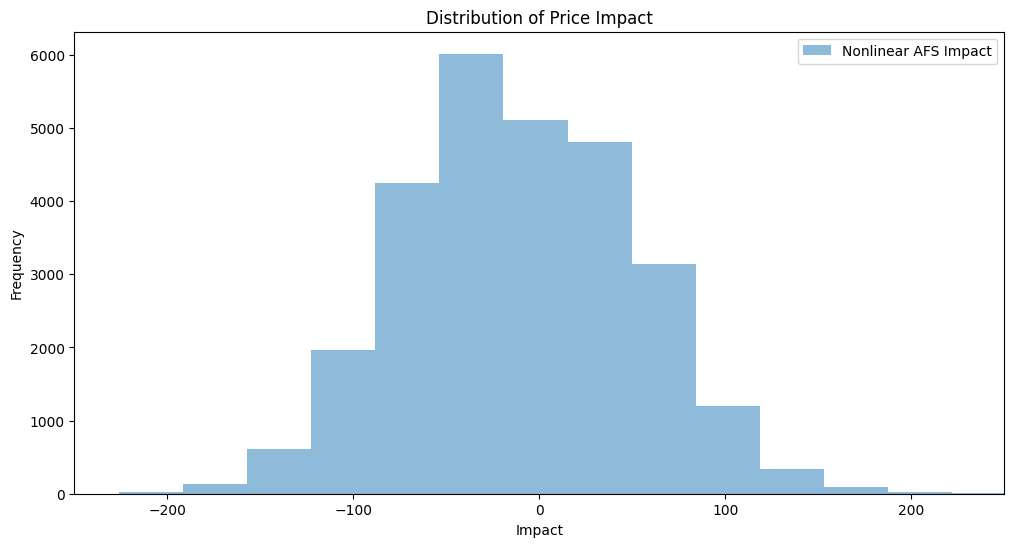

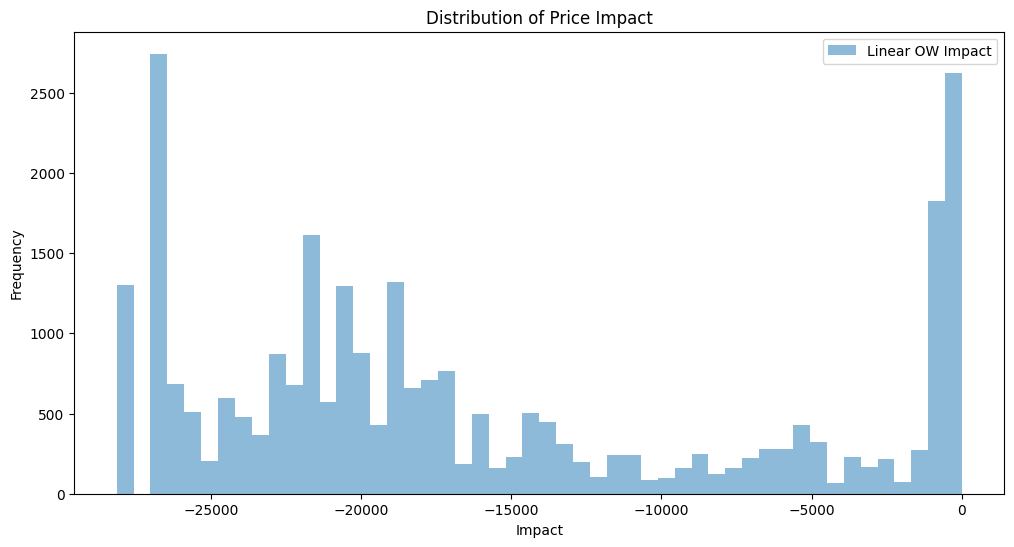

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#dataset
data = pd.read_csv('merged_data.csv')

#data for signed volume
data['Signed Volume'] = data['bid_fill'] - data['ask_fill']

#linear OW model
data['OW_impact'] = data['Signed Volume'].cumsum() * 0.001

#nonlinear AFS model
data['AFS_impact'] = np.sign(data['Signed Volume']) * np.sqrt(np.abs(data['Signed Volume']))

#plot nonlinear AFS model
plt.figure(figsize = (12, 6))
plt.hist(data['AFS_impact'], bins = 50, alpha = 0.5, label = 'Nonlinear AFS Impact')
plt.title('Distribution of Price Impact')
plt.xlim(-250, 250)
plt.xlabel('Impact')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#plot linear OW model
plt.figure(figsize = (12, 6))
plt.hist(data['OW_impact'], bins = 50, alpha = 0.5, label = 'Linear OW Impact')
plt.title('Distribution of Price Impact')
plt.xlabel('Impact')
plt.ylabel('Frequency')
plt.legend()
plt.show()

2. Implement and code the optimal strategy with Linear Impact and visualize the Sharpe Ratio plots in Section 6.2. (33 pt)

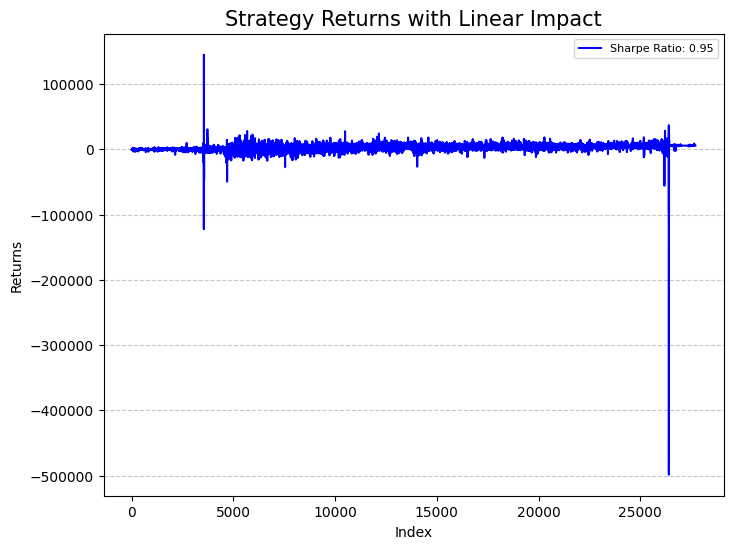

In [14]:
#linear strategy
def linear_strategy(signal, imapct, alpha, beta):
  return alpha * signal - beta * impact

signal = data['Signed Volume']
data['price_impact'] = data['Signed Volume'].cumsum() * 0.001
impact = data['price_impact']
alpha = 0.4
beta = 0.2

#strategy returns
strategy_returns = linear_strategy(signal, impact, alpha, beta)
clipped_returns = np.clip(strategy_returns, -1000, 1000)

sharpe_ratio = clipped_returns.mean() / clipped_returns.std()

#plot of strategy returns
plt.figure(figsize = (8, 6))
plt.plot(strategy_returns, label = f'Sharpe Ratio: {sharpe_ratio:.2f}', color = 'blue')
plt.title('Strategy Returns with Linear Impact', fontsize = 15)
plt.xlabel('Index', fontsize = 10)
plt.ylabel('Returns', fontsize = 10)
plt.legend(fontsize = 8)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

3. Implement and code the Deep Learning Algorithm in for discrete setting in Appendix C.2 and visualize the training loss for different network structures in Appendix C.2. (33 pt)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


693/693 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0584 - val_loss: 1.0548e-04
Epoch 2/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.4302e-04 - val_loss: 2.8634e-05
Epoch 3/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7.7563e-05 - val_loss: 2.8863e-05
Epoch 4/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8.4683e-05 - val_loss: 3.0947e-05
Epoch 5/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 6.6344e-05 - val_loss: 3.7806e-05
Epoch 6/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4.1763e-05 - val_loss: 3.0954e-05
Epoch 7/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.1340e-05 - val_loss: 4.8465e-05
Epoch 8/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.8627e-05 - val_loss: 9.7892e-05
Epoch 9/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.7135e-05 - val_loss: 3.7485e-05
Epoch 10/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.9925e-05 - val_loss: 2.6038e-05
Epoch 11/50
693/693 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.9258e-05 - 

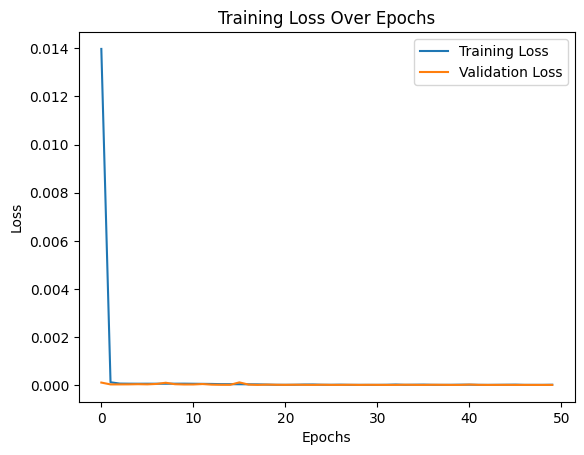

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

if 'holdings' not in data.columns:
  data['holdings'] = alpha * data['Signed Volume'] - beta * data['price_impact']

scaler = MinMaxScaler()
features = scaler.fit_transform(data[['Signed Volume', 'OW_impact', 'AFS_impact']])
labels = scaler.fit_transform(data[['holdings']])

Xtrain, Xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.2, random_state = 42)

Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (Xtrain.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

history = model.fit(Xtrain, ytrain, epochs = 50, batch_size = 32, validation_data = (Xtest, ytest))

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()